# Import necessary packages

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

In [15]:
# define data file name
data_file = "../project1_data/Rice_Cammeo_Osmancik.csv"
#load data
data = pd.read_csv(data_file)
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


# Remove non-numeric columns

In [16]:
data_numeric = data.select_dtypes(include=[np.number])

# Outliers: boxplot

## Data Loading and Preprocessing

In [18]:
# Select columns for analysis
raw_data = data_numeric.values
cols = range(0, 7)
X_raw = raw_data[:, cols]
X = X_raw.astype('float64')

# Retrieve attribute names and class labels
attributeNames = np.array(data.columns[cols])
classLabels = np.array(raw_data[:, -1]) 
classNames = np.unique(classLabels)
C = np.array(int(len(classNames)))

# Convert class labels into numerical format
y = np.empty(X.shape[0])
for i in range(0, X.shape[0]):
    y[i] = 0 if classLabels[i] == "b'Cammeo'" else 1
y = y.astype(int)


# Number of attributes and samples
M = np.array((len(attributeNames)))
N = np.array((len(y)))

## Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

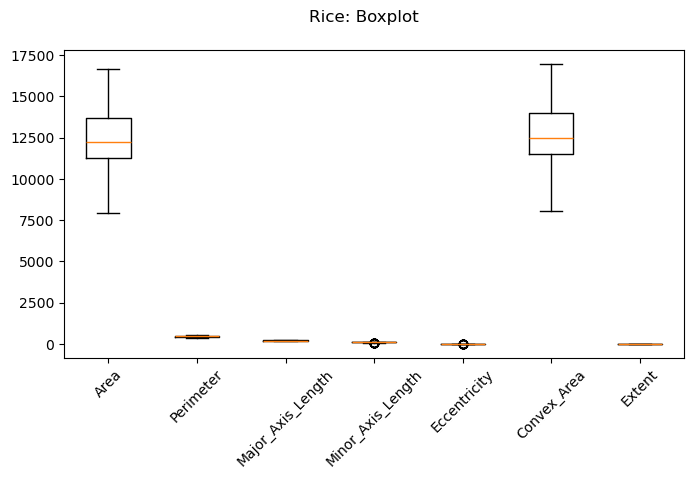

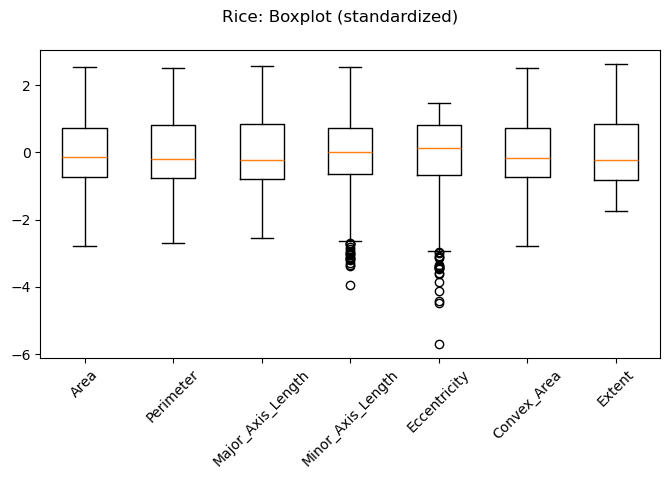

In [55]:
# Box plot of each attribute
plt.figure(figsize=(8, 4))
plt.suptitle("Rice: Boxplot")
plt.boxplot(X)
plt.xticks(range(1, M + 1), attributeNames, rotation=45);

# Box plot of standardized data to identify outliers
plt.figure(figsize=(8, 4))
plt.suptitle("Rice: Boxplot (standardized)")
plt.boxplot(zscore(X, ddof=1))
plt.xticks(range(1, M + 1), attributeNames, rotation=45);

plt.show


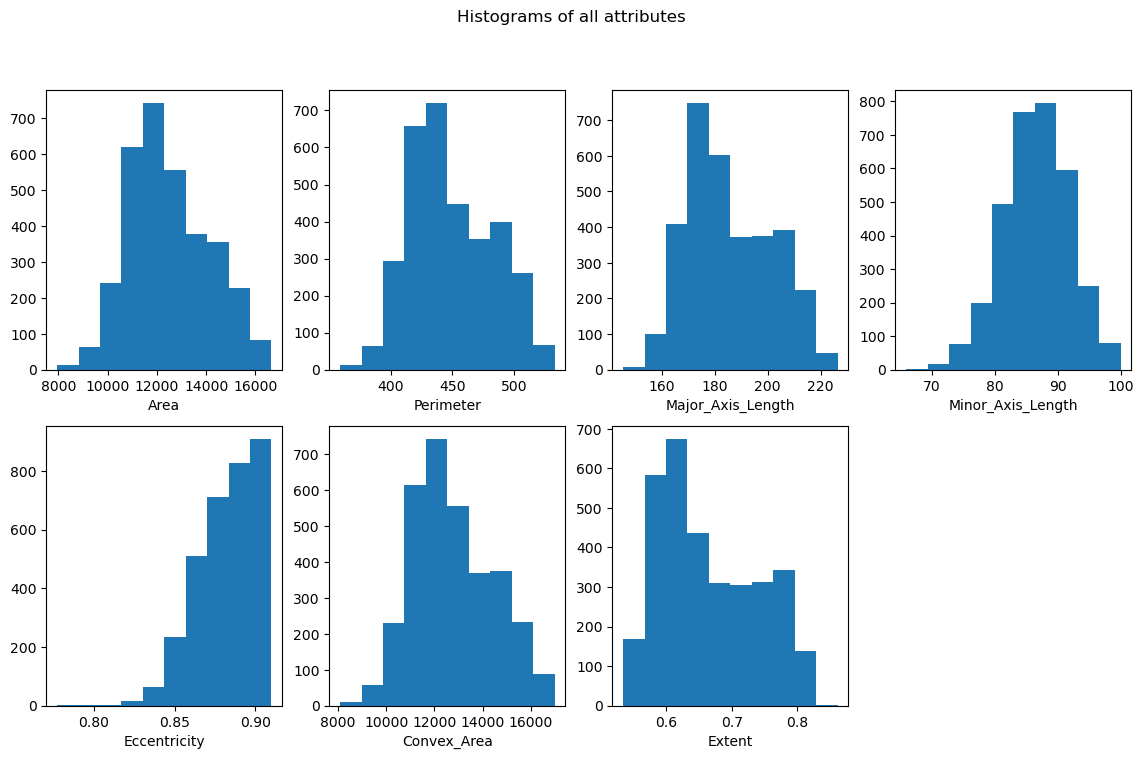

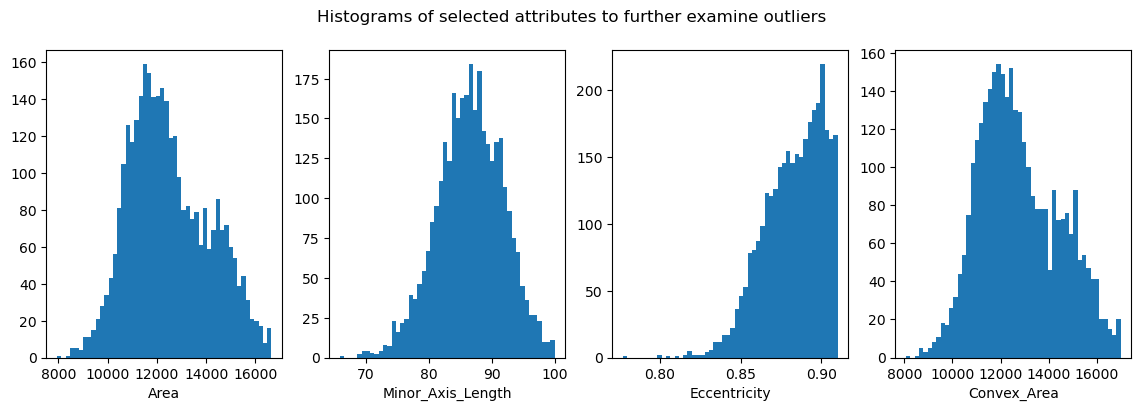

In [51]:
# Histograms of all attributes
plt.figure(figsize=(14, 8))
plt.suptitle("Histograms of all attributes")
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i])
    plt.xlabel(attributeNames[i])
    plt.ylim()

# Histograms of selected attributes to further examine outliers
plt.figure(figsize=(14, 4))
plt.suptitle("Histograms of selected attributes to further examine outliers")
m = [0, 3, 4, 5]
for i in range(len(m)):
    plt.subplot(1, len(m), i + 1)
    plt.hist(X[:, m[i]], 50)
    plt.xlabel(attributeNames[m[i]])
    plt.ylim()

plt.show()

## Outlier Detection and Removal

<function matplotlib.pyplot.show(close=None, block=None)>

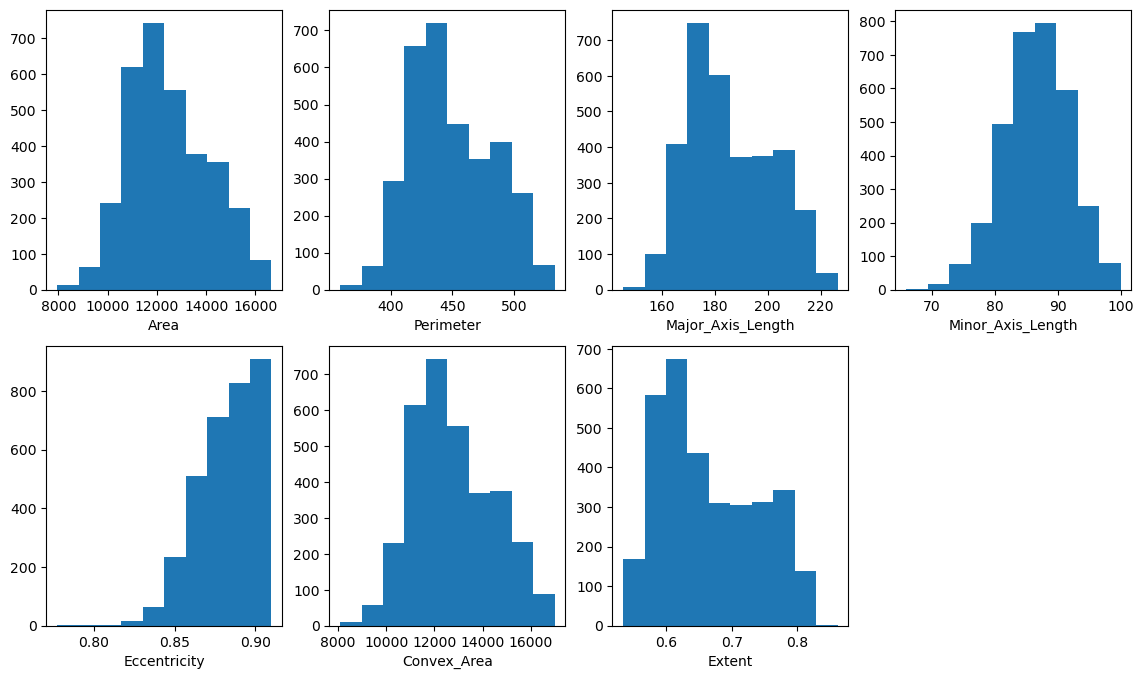

In [53]:
# Define outlier mask and remove these from the dataset
outlier_mask = (X[:, 0] > 17000) | (X[:, 3] > 100) | (X[:, 4] > 0.91) | (X[:, 5] > 17000)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask, :]
y = y[valid_mask]
N = len(y)

# Re-check: no more outliers
plt.figure(figsize=(14, 8))
for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i])
    plt.xlabel(attributeNames[i])
    plt.ylim()
plt.show

# Check normality: Q-Q plot

In [ ]:
# Zhong writes his code here

# Check corrolation: corrolation matrix and heatplot

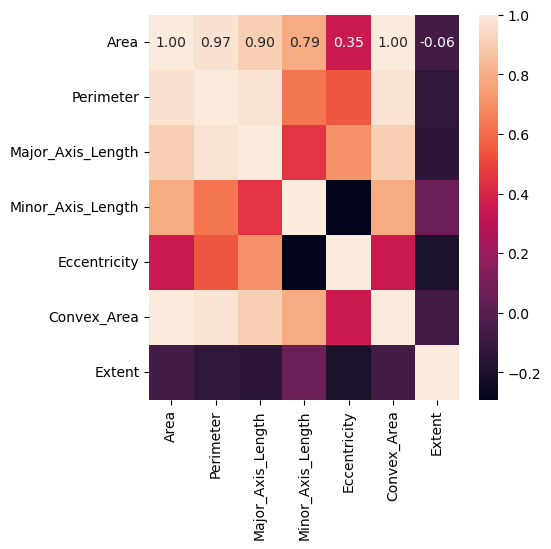

In [54]:
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=correlation_matrix.values, fmt=".2f",)
plt.show()

# PCA

In [ ]:
# Working together